<a href="https://colab.research.google.com/github/feirog/carbon-fp-warwick/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"*Pseudo-app*" - Food Carbon Footprint Calculator**

Because I am the 'beginnest' of beginners, and I have no idea of how to make it a real app or a website. :,D

... So, here's what I was able to make! Hope you enjoy it!^^

(please, run it before starting~)

In [8]:
#this is to plot inside the notebook
%matplotlib inline

# Let's start by importing some libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib

# A seed for the random number generator if I need it
np.random.seed(15)

# Makes plots look nicer
matplotlib.style.use("seaborn-notebook")

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
#-----------------------------------------------

Below we will put the data collected by Poore & Nemecek (2018):

In [19]:
ghg_emissions = np.array([0.6,0.4,0.2,0.9,1.2,0.6,1.4,3.2,1.8,8,4,3,12,1.0,20,6.3,7.3,3.6,3.8,5.4,2.1,0.5,0.4,0.5,0.5,0.4,0.9,0.4,1.5,0.1,1.1,0.4,2.3,500,170,200,76,57,3.2,110,42,60,180])
product = ('Wheat & Rye (Bread)','Maize (Meal)','Barley (Beer)','Oatmeal','Rice','Potatoes','Cassava','Cane Sugar',
                    'Beet Sugar','Other Pulses','Peas','Nuts','Groundnuts','Soymilk','Tofu','Soybean Oil','Palm Oil','Sunflower Oil',
                    'Rapeseed Oil','Olive Oil','Tomatoes','Onions & Leeks','Root Vegetables','Brassicas','Other Vegetables','Citrus Fruit',
                    'Bananas','Apples','Berries & Grapes','Wine','Other Fruit','Coffee','Dark Chocolate','Bovine Meat (beef herd)','Bovine Meat (dairy herd)',
                    'Lamb & Mutton','Pig Meat','Poultry Meat','Milk','Cheese','Eggs','Fish (farmed)','Crustaceans (farmed)')
portion = ('kcal','kcal','unit (10 ml of alcohol)','kcal','kcal','kcal','kcal',
                    'kg','kg','kg protein','kg protein','kg protein','kg protein','L','kg protein','L','L',
                    'L','L','L','kg','kg','kg','kg','kg','kg','kg',
                    'kg','kg','unit (10 ml of alcohol)','kg','serving (1 cup, 15g)','serving (50g)',
                    'kg protein','kg protein','kg protein','kg protein','kg protein', 'L','kg protein','kg protein','kg protein',
                    'kg protein')

#To suggest alternatives, let's classify them!
meat = ['Bovine Meat (beef herd)','Bovine Meat (dairy herd)','Lamb & Mutton','Pig Meat','Poultry Meat']
fish = ['Crustaceans (farmed)','Fish (farmed)']
grain = ['Groundnuts','Nuts','Other Pulses','Peas']
other_protein = ['Cheese','Eggs','Tofu']
milks = ['Milk','Soymilk']
starch_rich = ['Cassava','Rice','Oatmeal','Potatoes', 'Wheat & Rye (Bread)','Maize (Meal)']
oils = ['Palm Oil','Soybean Oil','Olive Oil','Rapeseed Oil','Sunflower Oil']
vegetables = ['Tomatoes','Onions & Leeks','Root Vegetables','Brassicas','Other Vegetables']
fruits = ['Citrus Fruit','Bananas','Apples','Berries & Grapes','Other Fruit']
sugars = ['Cane Sugar','Beet Sugar']
alcoholic_beverages = ['Barley (Beer)','Wine']
stimulants = ['Coffee','Dark Chocolate']

options = ('Meat','Fish','Grain','Other protein sources (tofu, eggs...)','Milks','Starch rich food (potatoes, bread, rice...)',
           'Oils','Vegetables','Fruits','Sugars','Alcoholic beverages','Stimulants (coffee, dark chocolate)','Nothing else')
options_var = [meat,fish,grain,other_protein,milks,starch_rich,oils,vegetables,fruits,sugars,alcoholic_beverages,stimulants]
ghg_count = 0
ingredients = list()
ingredients_contribution = []
alternative = list()
alt_contribution = []



## **START!**

Hi everybody, and **welcome**!

As you might have noticed, we are living in quite the eventful times. And we just got started! Climate change has already been causing many disasters everywhere around.

So, because of this, I'd like to thank you for taking your time to inform yourself about the **impact your dietary choices have on the environment**. ^^

To quantify this, we will use the '**Carbon Footprint**' measure, which -in simple terms- outputs the CO2 the subject is responsible for releasing. It accounts for all the energy, water, and resources that were needed to produce it.

I will also try to provide you with some **alternatives**, but please take into account these will be made ***only*** based on a lesser Carbon Footprint and should ***not*** be taken as health advice. Remember to keep a varied diet! <----(the alternatives will be a future update, I ran out of time hehe!)


### Let's begin!

What was on your meal?
Choose from below:
	 0 	 Meat
	 1 	 Fish
	 2 	 Grain
	 3 	 Other protein sources (tofu, eggs...)
	 4 	 Milks
	 5 	 Starch rich food (potatoes, bread, rice...)
	 6 	 Oils
	 7 	 Vegetables
	 8 	 Fruits
	 9 	 Sugars
	 10 	 Alcoholic beverages
	 11 	 Stimulants (coffee, dark chocolate)
	 12 	 Nothing else
0
 
Which option fits more the Meat you had? --- (please choose a similar if it isn`t shown here)
	 0 	 Bovine Meat (beef herd)
	 1 	 Bovine Meat (dairy herd)
	 2 	 Lamb & Mutton
	 3 	 Pig Meat
	 4 	 Poultry Meat
	 5 	 None of these are close to what I ate.
	 6 	(Go back to the categories.)
0
Cool!
What was the approximate amount in kg protein of Bovine Meat (beef herd) ?
0.5
 
What else was on your meal?
Choose from below:
	 0 	 Meat
	 1 	 Fish
	 2 	 Grain
	 3 	 Other protein sources (tofu, eggs...)
	 4 	 Milks
	 5 	 Starch rich food (potatoes, bread, rice...)
	 6 	 Oils
	 7 	 Vegetables
	 8 	 Fruits
	 9 	 Sugars
	 10 	 Alcoholic beverages
	 11 	 Stimulants (coffee

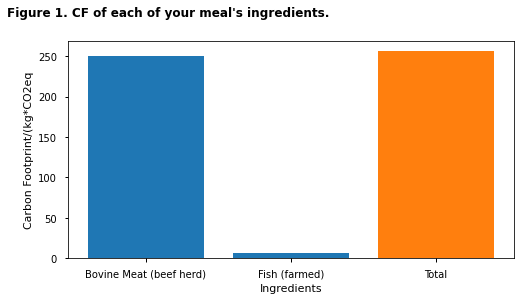

In [ ]:
print('What was on your meal?')
for n in range(100):
  print('Choose from below:')
  for idx in range(len(options)):
    print('\t',idx,'\t',options[idx])
  choice = int(input())

  if choice == 12:
    break

  print(" ")

  print('Which option fits more the',options[choice],'you had? --- (please choose a similar if it isn`t shown here)')
  food_cat = options_var[choice]
  for food in range(len(food_cat)):
    print('\t',food,'\t',food_cat[food])
  print('\t',len(food_cat),'\t None of these are close to what I ate.')
  print('\t',len(food_cat)+1,'\t(Go back to the categories.)')
  exact_choice = int(input())

  if exact_choice == (len(food_cat)):
    print('Oh! We are sorry to hear that. Current data is still very limited sadly.')
    print('Let`s continue with the next ingredient~')
    
  if exact_choice < (len(food_cat)):
    general_idx = product.index(food_cat[exact_choice])
    print('Cool!')
    print('What was the approximate amount in',portion[general_idx],'of',product[general_idx],'?')
    amount = float(input())*ghg_emissions[general_idx]
    ghg_count += amount
    ingredients.append(product[general_idx])
    ingredients_contribution.append(amount)
  print(" ")
  print("What else was on your meal?")

print("...")
print("...")
print("...Calculating...")
print("...")
print("...")

print('Alright! Here is the Carbon Footprint of your meal:')
print('Total:',ghg_count.sum(),'kg*CO2eq')
print(" ")
print(" ")
print('Would you like to see what each ingredient contributed to the overall value?')
desglose = input('Yes or No ')
if desglose == 'Yes' or 'yes':
  fig,ax = plt.subplots(figsize=(8,4))
  ax.bar(ingredients,ingredients_contribution)
  ax.bar('Total',ghg_count)
  fig.suptitle("Figure 1. CF of each of your meal's ingredients.", y = 1,  x = 0.3,fontweight="bold", size = 12)
  ax.set_xlabel("Ingredients")
  ax.set_ylabel("Carbon Footprint/(kg*CO2eq")
  plt.show(ax)

print(" ")
#Define and make it for the alternatives

In [3]:
#Testing optimised alternatives

#Imma make a dictionary and then convert it with pandas, let's try
import pandas as pd
data = {
    'Product' : ['Wheat & Rye (Bread)','Maize (Meal)','Barley (Beer)','Oatmeal','Rice','Potatoes','Cassava','Cane Sugar',
                    'Beet Sugar','Other Pulses','Peas','Nuts','Groundnuts','Soymilk','Tofu','Soybean Oil','Palm Oil','Sunflower Oil',
                    'Rapeseed Oil','Olive Oil','Tomatoes','Onions & Leeks','Root Vegetables','Brassicas','Other Vegetables','Citrus Fruit',
                    'Bananas','Apples','Berries & Grapes','Wine','Other Fruit','Coffee','Dark Chocolate','Bovine Meat (beef herd)','Bovine Meat (dairy herd)',
                    'Lamb & Mutton','Pig Meat','Poultry Meat','Milk','Cheese','Eggs','Fish (farmed)','Crustaceans (farmed)'],
    'GFG Emission' : [0.6,0.4,0.2,0.9,1.2,0.6,1.4,3.2,1.8,8,4,3,12,1.0,20,6.3,7.3,3.6,3.8,5.4,2.1,0.5,0.4,0.5,0.5,0.4,0.9,0.4,1.5,0.1,1.1,0.4,2.3,500,170,200,76,57,3.2,110,42,60,180],
    'Portion measurement (1 unit)' : ['kcal','kcal','unit (10 ml of alcohol)','kcal','kcal','kcal','kcal',
                    'kg','kg','kg protein','kg protein','kg protein','kg protein','L','kg protein','L','L',
                    'L','L','L','kg','kg','kg','kg','kg','kg','kg',
                    'kg','kg','unit (10 ml of alcohol)','kg','serving (1 cup, 15g)','serving (50g)',
                    'kg protein','kg protein','kg protein','kg protein','kg protein', 'L','kg protein','kg protein','kg protein',
                    'kg protein'],
    'Type' : [s_r,s_r,a,s_r,g,]
}
s_r='starch rich'
st = 'stimulant'
m = 'meat'
f = 'fish'
g = 'grain'
ops = 'other protein sources'
ml = 'milk'
o = 'oils'
v = 'vegetables'
ft = 'fruit'
s = 'sugars'
a = 'alcoholic beverages'


df = pd.DataFrame(data)
display(df)

,Product,GFG Emission,Portion measurement (1 unit)
0,Wheat & Rye (Bread),0.6,kcal
1,Maize (Meal),0.4,kcal
2,Barley (Beer),0.2,unit (10 ml of alcohol)
3,Oatmeal,0.9,kcal
4,Rice,1.2,kcal
5,Potatoes,0.6,kcal
6,Cassava,1.4,kcal
7,Cane Sugar,3.2,kg
8,Beet Sugar,1.8,kg
9,Other Pulses,8.0,kg protein


[[500.0, 170.0, 200.0, 76.0, 57.0], [180.0, 60.0], [12.0, 3.0, 8.0, 4.0], [110.0, 42.0, 20.0], [3.2, 1.0], [1.4, 1.2, 0.9, 0.6, 0.6, 0.4], [7.3, 6.3, 5.4, 3.8, 3.6], [2.1, 0.5, 0.4, 0.5, 0.5], [0.4, 0.9, 0.4, 1.5, 1.1], [3.2, 1.8], [0.2, 0.1], [0.4, 2.3]]
[['Bovine Meat (beef herd)', 'Bovine Meat (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat'], ['Crustaceans (farmed)', 'Fish (farmed)'], ['Groundnuts', 'Nuts', 'Other Pulses', 'Peas'], ['Cheese', 'Eggs', 'Tofu'], ['Milk', 'Soymilk'], ['Cassava', 'Rice', 'Oatmeal', 'Potatoes', 'Wheat & Rye (Bread)', 'Maize (Meal)'], ['Palm Oil', 'Soybean Oil', 'Olive Oil', 'Rapeseed Oil', 'Sunflower Oil'], ['Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Brassicas', 'Other Vegetables'], ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'], ['Cane Sugar', 'Beet Sugar'], ['Barley (Beer)', 'Wine'], ['Coffee', 'Dark Chocolate']]
What was on your meal?
Choose from below:
	 0 	 Meat
	 1 	 Fish
	 2 	 Grain
	 3 	 Other protein so

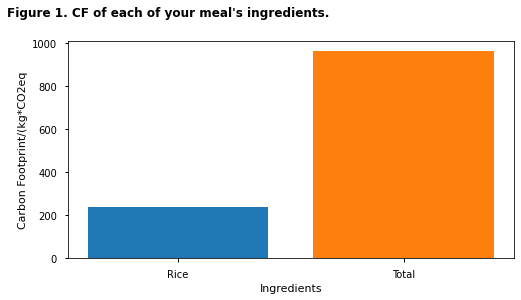

 
['Oatmeal', 'Potatoes', 'Wheat & Rye (Bread)', 'Maize (Meal)', 'Oatmeal', 'Potatoes', 'Wheat & Rye (Bread)', 'Maize (Meal)']
[0.9, 0.6, 0.6, 0.4, 0.9, 0.6, 0.6, 0.4]


In [31]:
#we can use this to check for alternatives

meat_dic=[]
fish_dic=[]
grain_dic=[]
other_protein_dic=[]
milks_dic=[]
starch_rich_dic=[]
oils_dic=[]
vegetables_dic=[]
fruits_dic=[]
sugars_dic=[]
alcoholic_beverages_dic=[]
stimulants_dic=[]
types_food_dics = [meat_dic,fish_dic,grain_dic,other_protein_dic,milks_dic,starch_rich_dic,oils_dic,vegetables_dic,fruits_dic,sugars_dic,alcoholic_beverages_dic,stimulants_dic]
for i in range(len(options_var)):
  for b in options_var[i]:
    types_food_dics[i].append(ghg_emissions[product.index(b)])
print(types_food_dics)
print(options_var)


print('What was on your meal?')
for n in range(100):
  print('Choose from below:')
  for idx in range(len(options)):
    print('\t',idx,'\t',options[idx])
  choice = int(input())

  if choice == 12:
    break

  print(" ")

  print('Which option fits more the',options[choice],'you had? --- (please choose a similar if it isn`t shown here)')
  food_cat = options_var[choice]
  for food in range(len(food_cat)):
    print('\t',food,'\t',food_cat[food])
  print('\t',len(food_cat),'\t None of these are close to what I ate.')
  print('\t',len(food_cat)+1,'\t(Go back to the categories.)')
  exact_choice = int(input())

  if exact_choice == (len(food_cat)):
    print('Oh! We are sorry to hear that. Current data is still very limited sadly.')
    print('Let`s continue with the next ingredient~')
    
  if exact_choice < (len(food_cat)):
    general_idx = product.index(food_cat[exact_choice])
    print('Cool!')
    print('What was the approximate amount in',portion[general_idx],'of',product[general_idx],'?')
    amount = float(input())*ghg_emissions[general_idx]
    ghg_count += amount
    ingredients.append(product[general_idx])
    ingredients_contribution.append(amount)

    #Here alternatives
    for alt in range(len(options_var[choice])):
      if types_food_dics[choice][exact_choice] > types_food_dics[choice][alt]:
        alternative.append(options_var[choice][alt])
        alt_contribution.append(types_food_dics[choice][alt])
  print(" ")
  print("What else was on your meal?")

print("...")
print("...")
print("...Calculating...")
print("...")
print("...")

print('Alright! Here is the Carbon Footprint of your meal:')
print('Total:',ghg_count.sum(),'kg*CO2eq')
print(" ")
print(" ")
print('Would you like to see what each ingredient contributed to the overall value?')
desglose = input('Yes or No ')
if desglose == 'Yes' or 'yes':
  fig,ax = plt.subplots(figsize=(8,4))
  ax.bar(ingredients,ingredients_contribution)
  ax.bar('Total',ghg_count)
  fig.suptitle("Figure 1. CF of each of your meal's ingredients.", y = 1,  x = 0.3,fontweight="bold", size = 12)
  ax.set_xlabel("Ingredients")
  ax.set_ylabel("Carbon Footprint/(kg*CO2eq")
  plt.show(ax)

print(" ")
#Define and make it for the alternatives
print(alternative)
print(alt_contribution)

In [32]:
!git init

Initialized empty Git repository in /content/.git/
